In [1]:
# A notebook for an exploration on the predictors for logistic and linear regression
# As well as an exploration into more feature engineering.

In [2]:
# Since video is on top level
import sys
sys.path.append("../")

In [3]:
import numpy as np
import os
import pandas as pd
from video_utils import CatVideo
import re
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
import cpbd
from scipy import ndimage
import statsmodels.api as sm

import seaborn as sn
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score
from keras_segmentation.pretrained import pspnet_50_ADE_20K , pspnet_101_cityscapes, pspnet_101_voc12
from PIL import Image

Using TensorFlow backend.


In [4]:
x_headers = [
    "eye_ratio", "head_size", "ear_ratio", 
    "conf_head", "conf_eye_0", "conf_eye_1", 
    "conf_ear_0", "conf_ear_1", "conf_nose", "sharpness", "head_location"
]

In [5]:
"""
Load up predictors and display them.
"""

predictors = np.loadtxt("../data/regression_training/features_v2.txt")
predictors_df = pd.DataFrame(predictors, columns=x_headers)
display(predictors_df)

,eye_ratio,head_size,ear_ratio,conf_head,conf_eye_0,conf_eye_1,conf_ear_0,conf_ear_1,conf_nose,sharpness,head_location
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.000000,0.000000,0.000000,0.000000,0.285022,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
4,0.000000,0.000000,0.000000,0.000000,0.894592,0.000000,0.806655,0.000000,0.578450,0.000000,1.000000
5,0.874559,0.086370,0.510148,0.926741,0.938150,0.887530,0.984550,0.749880,0.921693,0.402862,0.161359
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
7,0.505956,0.375955,0.000000,0.708893,0.890296,0.560150,0.000000,0.000000,0.000000,0.087710,0.217187
8,0.926471,0.071832,0.000000,0.839750,0.535549,0.514691,0.784741,0.000000,0.957674,0.382975,0.344165
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [6]:
# Each item in X-headers is just a labeled image in the a random video
# A frame where none of the items are 0, no cat is detected.

In [7]:
frames_df = pd.read_csv("../data/regression_training/score_v2.csv", names=["labeler", "video", "frame_seconds", "score"])

# Grab all frames where there's a cat
frames_df = frames_df[frames_df["score"] > 0].reset_index()
# display(frames_df)

# Now create a DF concating the predictors, and score + frame_metadata
data_df = pd.concat([predictors_df, frames_df], axis=1)

headers_to_sum = x_headers[:-1]

# Sum all columns for a given row, and if anything is greater than 0, use the row
data_df["sum"] = data_df[headers_to_sum].sum(axis=1)

data_df = data_df[data_df["sum"] > 0].reset_index()
# data_df = data_df[np.logical_and(data_df["sum"] > 0, data_df["head_location"] < 1)].reset_index()

# Shuffle all of the data
data_df = data_df.sample(frac=1).reset_index(drop=True)
display(data_df)

,level_0,eye_ratio,head_size,ear_ratio,conf_head,conf_eye_0,conf_eye_1,conf_ear_0,conf_ear_1,conf_nose,sharpness,head_location,index,labeler,video,frame_seconds,score,sum
0,331,0.799474,0.288239,0.813487,0.943960,0.969909,0.966309,0.974699,0.963765,0.705150,0.141405,0.268396,364,shravan,video_3.mp4,6.108572,3,7.566397
1,462,0.407257,0.037948,0.856914,0.792007,0.913326,0.820872,0.835849,0.720804,0.908449,0.377663,0.307798,502,shravan,cat65.mp4,7.896297,5,6.671089
2,185,0.000000,0.240604,0.000000,0.871304,0.632350,0.000000,0.475833,0.000000,0.000000,0.526998,0.142568,201,NaN,cat31.mp4,13.607160,3,2.747089
3,266,0.838603,0.090787,0.616262,0.866183,0.929859,0.915228,0.617315,0.487343,0.532182,0.110876,0.320084,291,NaN,cat78.mp4,2.440420,3,6.004637
4,38,0.862937,0.000000,0.000000,0.000000,0.782875,0.270347,0.485303,0.000000,0.503380,0.000000,1.000000,41,all,cat34.mp4,17.249250,3,2.904841
5,375,0.610550,0.259120,0.000000,0.676258,0.745872,0.710520,0.000000,0.000000,0.531531,0.251690,0.114566,410,shravan,video_4.mp4,13.599271,4,3.785541
6,431,0.881159,0.000000,0.000000,0.000000,0.352936,0.293657,0.000000,0.000000,0.387528,0.000000,1.000000,468,shravan,cat78.mp4,3.395074,2,1.915281
7,344,0.000000,0.113750,0.000000,0.536068,0.294427,0.000000,0.670013,0.000000,0.000000,0.371870,0.434912,377,shravan,video_9.mp4,23.644625,2,1.986127
8,195,0.813187,0.116370,0.767568,0.907037,0.963205,0.913443,0.958135,0.899834,0.975052,0.483580,0.190773,211,NaN,cat50.mp4,12.796030,5,7.797410
9,326,0.000000,0.037431,0.000000,0.450145,0.000000,0.000000,0.000000,0.000000,0.000000,0.477044,0.247580,359,shravan,video_2.mp4,31.142440,4,0.964619


In [8]:
"""
Notes on the predictors

Conf_eye_0 is the maximum confidence amongst all eyes detected
Conf_eye_1 is the second-greatest confidence amongst all eyes detected
Conf_ear_0 is maximum confidence amongst all ears detected
Conf_ear_1 second greatest confidence
Conf_nose = maximum confidence in nose detected
eye_ratio is the ratio between size of eyes
head_size is the relative size of the head; bounding box of head divided by frame
sharpness is still using the Variance of the Laplacian

Create another feature: two eyes detected; in the final predictor set, use the highest eye confidence.
"""

'\nNotes on the predictors\n\nConf_eye_0 is the maximum confidence amongst all eyes detected\nConf_eye_1 is the second-greatest confidence amongst all eyes detected\nConf_ear_0 is maximum confidence amongst all ears detected\nConf_ear_1 second greatest confidence\nConf_nose = maximum confidence in nose detected\neye_ratio is the ratio between size of eyes\nhead_size is the relative size of the head; bounding box of head divided by frame\nsharpness is still using the Variance of the Laplacian\n\nCreate another feature: two eyes detected; in the final predictor set, use the highest eye confidence.\n'

In [9]:
# Here are Andrew's initial coefficients, mapping to the order of what is returned in the function in process_video.py
# model_params_lin = np.load("../data/lin_params_v0.npy")

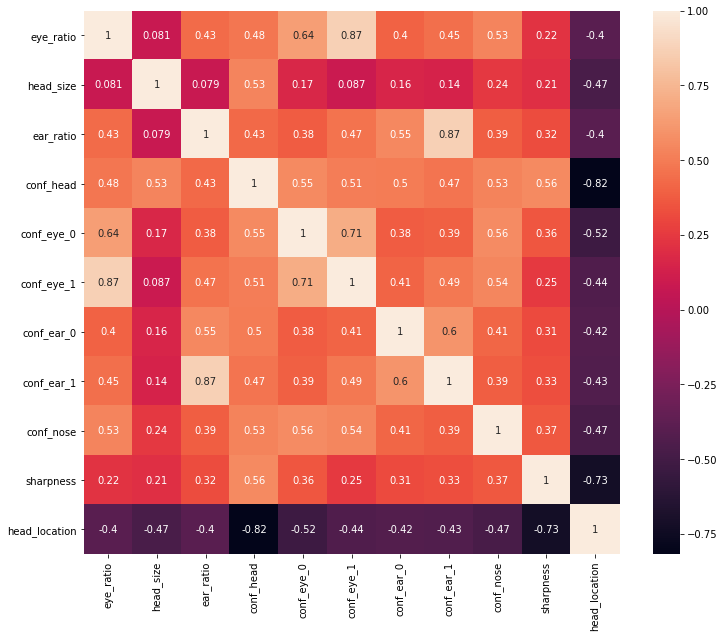

In [10]:
corrMatrix = data_df[x_headers].corr()
plt.figure(figsize=(12, 10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [11]:
# This correlation matrix tells us that we need to throw out one of the eyes
# data_df.drop(columns=["conf_eye_1", "conf_ear_1"])

,level_0,eye_ratio,head_size,ear_ratio,conf_head,conf_eye_0,conf_ear_0,conf_nose,sharpness,head_location,index,labeler,video,frame_seconds,score,sum
0,331,0.799474,0.288239,0.813487,0.943960,0.969909,0.974699,0.705150,0.141405,0.268396,364,shravan,video_3.mp4,6.108572,3,7.566397
1,462,0.407257,0.037948,0.856914,0.792007,0.913326,0.835849,0.908449,0.377663,0.307798,502,shravan,cat65.mp4,7.896297,5,6.671089
2,185,0.000000,0.240604,0.000000,0.871304,0.632350,0.475833,0.000000,0.526998,0.142568,201,NaN,cat31.mp4,13.607160,3,2.747089
3,266,0.838603,0.090787,0.616262,0.866183,0.929859,0.617315,0.532182,0.110876,0.320084,291,NaN,cat78.mp4,2.440420,3,6.004637
4,38,0.862937,0.000000,0.000000,0.000000,0.782875,0.485303,0.503380,0.000000,1.000000,41,all,cat34.mp4,17.249250,3,2.904841
5,375,0.610550,0.259120,0.000000,0.676258,0.745872,0.000000,0.531531,0.251690,0.114566,410,shravan,video_4.mp4,13.599271,4,3.785541
6,431,0.881159,0.000000,0.000000,0.000000,0.352936,0.000000,0.387528,0.000000,1.000000,468,shravan,cat78.mp4,3.395074,2,1.915281
7,344,0.000000,0.113750,0.000000,0.536068,0.294427,0.670013,0.000000,0.371870,0.434912,377,shravan,video_9.mp4,23.644625,2,1.986127
8,195,0.813187,0.116370,0.767568,0.907037,0.963205,0.958135,0.975052,0.483580,0.190773,211,NaN,cat50.mp4,12.796030,5,7.797410
9,326,0.000000,0.037431,0.000000,0.450145,0.000000,0.000000,0.000000,0.477044,0.247580,359,shravan,video_2.mp4,31.142440,4,0.964619


In [14]:
split_index = int(data_df.shape[0] * .80)
train_indices = range(split_index)
test_indices = range(split_index, data_df.shape[0])

X_train = data_df.iloc[train_indices][x_headers]
y_train = data_df.iloc[train_indices]["score"]

X_test = data_df.iloc[test_indices][x_headers]
y_test = data_df.iloc[test_indices]["score"]

In [15]:
 
model_logistic = LogisticRegression(penalty="l1")
model_logistic.fit(X_train, y_train)
results = model_logistic.predict(X_test)
# Accuracy score 
accuracy_score(y_test, results)

/Users/Emily/opt/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Emily/opt/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.45901639344262296

In [16]:
print(list(results), "Predicted")
print(list(y_test), "Actual")

results_probability = model_logistic.predict_proba(X_test)
print(results_probability)

[4, 5, 3, 3, 3, 5, 5, 3, 3, 2, 4, 3, 4, 3, 3, 4, 3, 3, 3, 2, 3, 4, 4, 2, 4, 4, 2, 4, 3, 4, 4, 4, 5, 4, 4, 5, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 4, 3, 3, 5, 4, 3, 2, 2, 3, 4, 4, 3, 3, 3, 4] Predicted
[5, 5, 2, 4, 2, 5, 5, 2, 2, 4, 2, 3, 5, 1, 1, 5, 3, 2, 3, 3, 1, 4, 3, 3, 4, 5, 3, 4, 4, 4, 4, 2, 5, 2, 4, 5, 5, 4, 2, 4, 4, 5, 4, 4, 4, 3, 4, 3, 2, 5, 4, 3, 1, 3, 3, 3, 4, 2, 1, 4, 4] Actual
[[0.01129978 0.04791481 0.22168558 0.41355315 0.30554668]
 [0.01028544 0.05256547 0.19024768 0.37288614 0.37401526]
 [0.15397334 0.32462945 0.33924538 0.17398466 0.00816718]
 [0.12730526 0.27273229 0.39171407 0.19980999 0.00843839]
 [0.08414455 0.21494889 0.36028533 0.30736958 0.03325165]
 [0.01458073 0.03895028 0.16553107 0.33494576 0.44599215]
 [0.0093691  0.04217397 0.1474369  0.37298083 0.42803921]
 [0.09274534 0.1265997  0.46378545 0.2958636  0.02100591]
 [0.03900898 0.31101746 0.43951343 0.19424349 0.01621663]
 [0.12526023 0.39500329 0.33971646 0.13177077 0.00824925]
 [0.02834104 0.04572624 0.23273293 

In [17]:
"""
Feed in a video
Of the video, run a logistic regression on all frames, with the probability picked out
Pick the image with the score of 5 as the maximum with the highest probability.
"""
from process_video import get_features_video
random_video_x = get_features_video("../data/videos/cat66.mp4", sample_rate=10, return_frames=True)


W0505 21:13:05.746227 4626640320 module_wrapper.py:139] From /Users/Emily/opt/anaconda3/envs/capstone/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0505 21:13:05.752790 4626640320 module_wrapper.py:139] From /Users/Emily/opt/anaconda3/envs/capstone/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0505 21:13:05.754966 4626640320 module_wrapper.py:139] From /Users/Emily/opt/anaconda3/envs/capstone/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0505 21:13:05.795343 4626640320 module_wrapper.py:139] From /Users/Emily/opt/anaconda3/envs/capstone/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please us

/Users/Emily/harvard_cse/semester_2/capstoneIACS2020/yolo_training/Data/Model_Weights/trained_weights_final.h5 model, anchors, and classes loaded in 28.89sec.


W0505 21:13:35.211227 4626640320 deprecation.py:323] From /Users/Emily/opt/anaconda3/envs/capstone/lib/python3.7/site-packages/tensorflow_core/python/ops/array_ops.py:1475: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
x_headers_test = [
    "junk", "eye_ratio", "head_size", "ear_ratio", 
    "conf_head", "conf_eye_0", "conf_eye_1", 
    "conf_ear_0", "conf_ear_1", "conf_nose", "sharpness", "head_location"
]
randx, randx_images = random_video_x
randx_df = pd.DataFrame(randx, columns=x_headers_test).drop(columns=["junk"])

0 THIS IS TBHE FRAME NUMBER


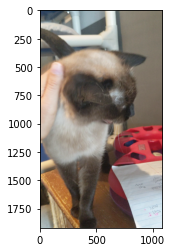

1 THIS IS TBHE FRAME NUMBER


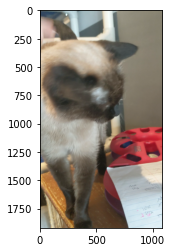

2 THIS IS TBHE FRAME NUMBER


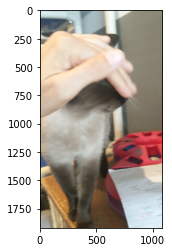

3 THIS IS TBHE FRAME NUMBER


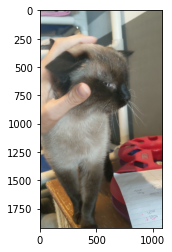

4 THIS IS TBHE FRAME NUMBER


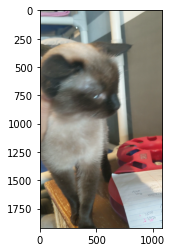

5 THIS IS TBHE FRAME NUMBER


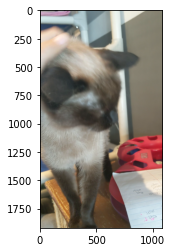

6 THIS IS TBHE FRAME NUMBER


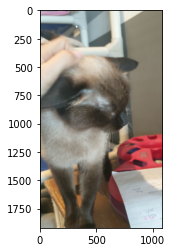

7 THIS IS TBHE FRAME NUMBER


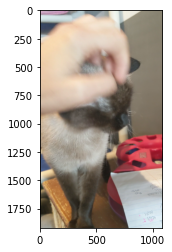

8 THIS IS TBHE FRAME NUMBER


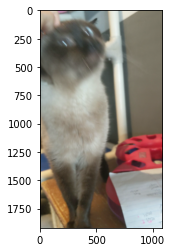

9 THIS IS TBHE FRAME NUMBER


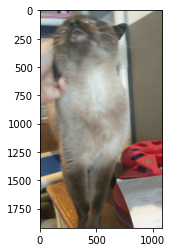

10 THIS IS TBHE FRAME NUMBER


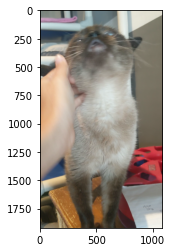

11 THIS IS TBHE FRAME NUMBER


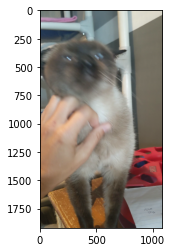

12 THIS IS TBHE FRAME NUMBER


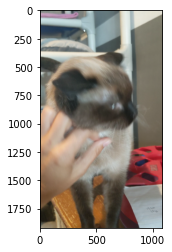

13 THIS IS TBHE FRAME NUMBER


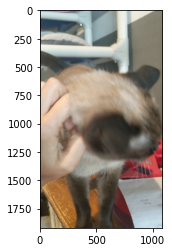

14 THIS IS TBHE FRAME NUMBER


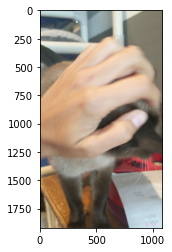

15 THIS IS TBHE FRAME NUMBER


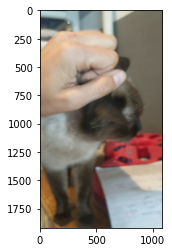

16 THIS IS TBHE FRAME NUMBER


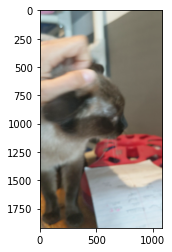

17 THIS IS TBHE FRAME NUMBER


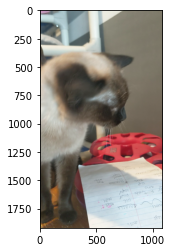

18 THIS IS TBHE FRAME NUMBER


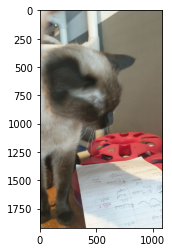

19 THIS IS TBHE FRAME NUMBER


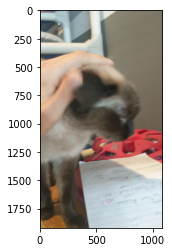

20 THIS IS TBHE FRAME NUMBER


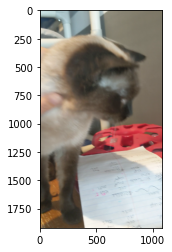

21 THIS IS TBHE FRAME NUMBER


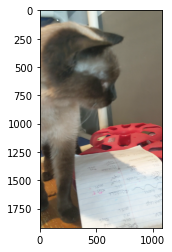

22 THIS IS TBHE FRAME NUMBER


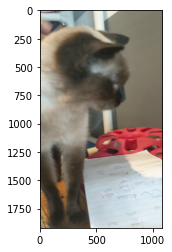

23 THIS IS TBHE FRAME NUMBER


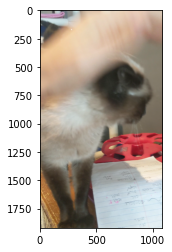

24 THIS IS TBHE FRAME NUMBER


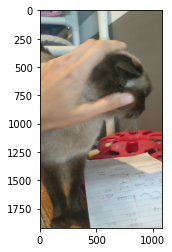

25 THIS IS TBHE FRAME NUMBER


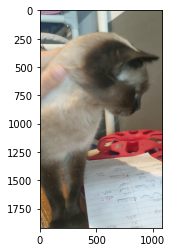

26 THIS IS TBHE FRAME NUMBER


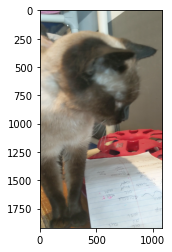

27 THIS IS TBHE FRAME NUMBER


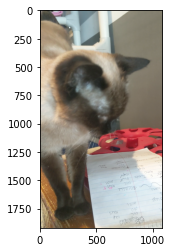

28 THIS IS TBHE FRAME NUMBER


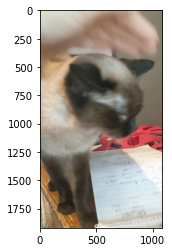

29 THIS IS TBHE FRAME NUMBER


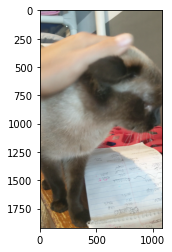

30 THIS IS TBHE FRAME NUMBER


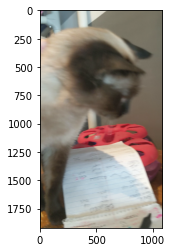

31 THIS IS TBHE FRAME NUMBER


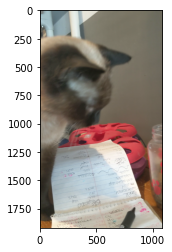

32 THIS IS TBHE FRAME NUMBER


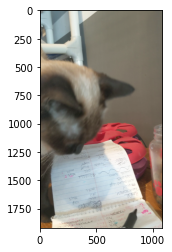

33 THIS IS TBHE FRAME NUMBER


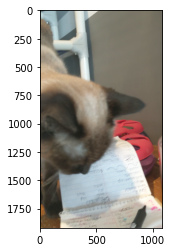

34 THIS IS TBHE FRAME NUMBER


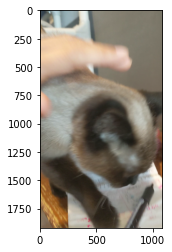

35 THIS IS TBHE FRAME NUMBER


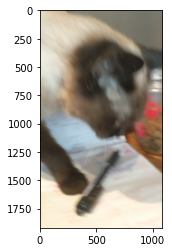

36 THIS IS TBHE FRAME NUMBER


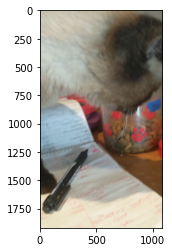

37 THIS IS TBHE FRAME NUMBER


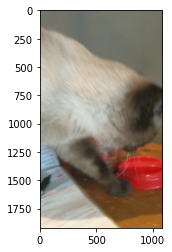

38 THIS IS TBHE FRAME NUMBER


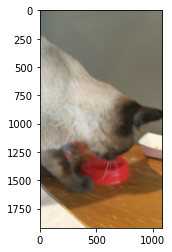

39 THIS IS TBHE FRAME NUMBER


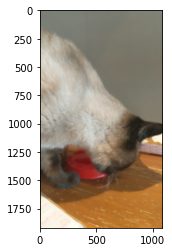

40 THIS IS TBHE FRAME NUMBER


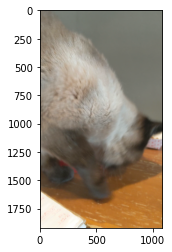

41 THIS IS TBHE FRAME NUMBER


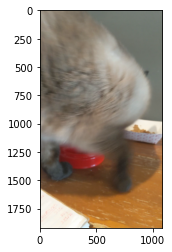

42 THIS IS TBHE FRAME NUMBER


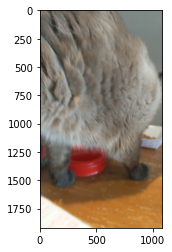

43 THIS IS TBHE FRAME NUMBER


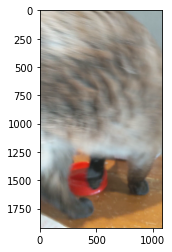

44 THIS IS TBHE FRAME NUMBER


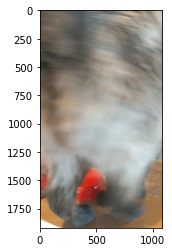

In [35]:
for i, img in enumerate(randx_images):
    print(i, "THIS IS TBHE FRAME NUMBER")
    plt.imshow(img)
    plt.show()

In [34]:
best_frame

39

In [31]:
rand_results = model_logistic.predict_proba(randx_df)
"""
weights: 0, 10, 20, 40, 60
"""
results_weighted = np.average(rand_results, weights=[0, 0, 0, 0, 1], axis=1)
best_frame = np.argmax(results_weighted)
randx_df.iloc[best_frame]
# plt.imshow(randx_images[best_frame])


eye_ratio        0.000000
head_size        0.708333
ear_ratio        0.000000
conf_head        0.441361
conf_eye_0       0.301608
conf_eye_1       0.000000
conf_ear_0       0.772906
conf_ear_1       0.000000
conf_nose        0.000000
sharpness        0.542082
head_location    0.008796
Name: 39, dtype: float64

In [44]:
def test_random_video(filepath, sample_rate=10):
    random_video_x = get_features_video(filepath, sample_rate=sample_rate, return_frames=True)
    x_headers_test = [
        "junk", "eye_ratio", "head_size", "ear_ratio", 
        "conf_head", "conf_eye_0", "conf_eye_1", 
        "conf_ear_0", "conf_ear_1", "conf_nose", "sharpness", "head_location"
    ]
    randx, randx_images = random_video_x
    randx_df = pd.DataFrame(randx, columns=x_headers_test).drop(columns=["junk"])
    rand_results = model_logistic.predict_proba(randx_df)
    """
    weights: 0, 10, 20, 40, 60
    """
    results_weighted = np.average(rand_results, weights=[0, 0, 0, 0, 1], axis=1)
    best_frame = np.argmax(results_weighted)
    randx_df.iloc[best_frame]
    plt.imshow(randx_images[best_frame])
    return (best_frame, randx, randx_images, rand_results)

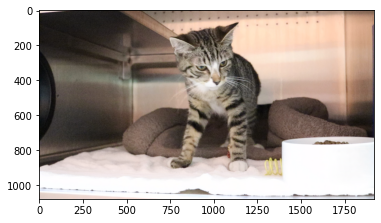

In [45]:
results = test_random_video("../data/videos/cat63.mp4", sample_rate=20)

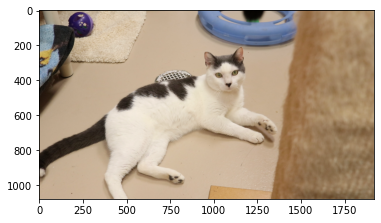

In [47]:
results1 = test_random_video("../data/videos/cat51.mp4", sample_rate=20)

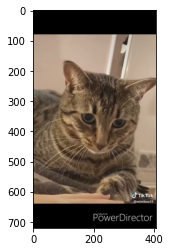

In [48]:
results2 = test_random_video("../data/videos/video_6.mp4", sample_rate=20)

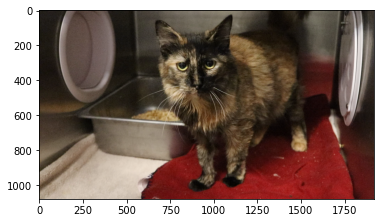

In [49]:
results3 = test_random_video("../data/videos/cat44.mp4", sample_rate=20)

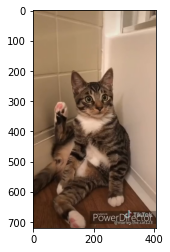

In [50]:
results4 = test_random_video("../data/videos/video_7.mp4", sample_rate=20)

In [41]:
# for i, img in enumerate(randx_images):
#     print(i, "THIS IS TBHE FRAME NUMBER")
#     plt.imshow(img)
#     plt.show()

rand_results = model_logistic.predict_proba(randx_df)
"""
weights: 0, 10, 20, 40, 60
"""
results_weighted = np.average(rand_results, weights=[0, 0, 0, 0, 1], axis=1)
best_frame = np.argmax(results_weighted)
randx_df.iloc[best_frame]
# plt.imshow(randx_images[best_frame])


eye_ratio        0.861598
head_size        0.013613
ear_ratio        0.882012
conf_head        0.620302
conf_eye_0       0.729261
conf_eye_1       0.613161
conf_ear_0       0.914783
conf_ear_1       0.798357
conf_nose        0.826628
sharpness        0.677455
head_location    0.208181
Name: 15, dtype: float64

15


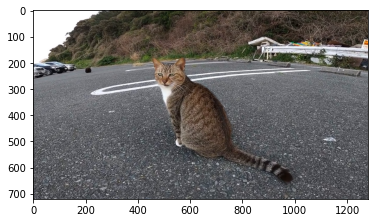

In [42]:
randx_df.iloc[best_frame]
plt.imshow(randx_images[best_frame])
print(best_frame)

In [ ]:
plt.imshow(randx_images[best_frame])


In [71]:
results3_

'\n1. Look through the 5s, see waht other features you think would make it look good\n2. Systematically test all our features and look at how it changes the test accuracy - Emily TODO (start)\n3. Color brightness / saturation - Emily TODO (today?)\n4. Detect cat and check where it is on the frame?\n5. Relative size of cat according to segmentation: ratio of cat to non-cat - Emily TODO (today?)\n'

In [72]:
# # Add a column to store the image data.
# data_df["image"] = None

# for i, frame in all_df.iterrows():
#     video_name = frame["video"].split(".mp4")[0]
#     image = Image.open(f"frames/{i}_{video_name}.png")


NameError: name 'all_df' is not defined

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  score   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              277.1
Date:                Tue, 05 May 2020   Prob (F-statistic):                   6.09e-102
Time:                        20:34:53   Log-Likelihood:                         -228.99
No. Observations:                 180   AIC:                                      480.0
Df Residuals:                     169   BIC:                                      515.1
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
eye_ratio        -0.1300      0.330     -0.393      0.695      -0.782       0.522
head_size        -1.4517      0.853     -1.702      0.091      -3.135       0.232
ear_ratio        -0.1280      0.334     -0.383      0.702      -0.787       0.531
conf_head         0.4105      0.345      1.191      0.235      -0.270       1.091
conf_eye_0        1.6059      0.331      4.856      0.000       0.953       2.259
conf_eye_1        0.5566      0.370      1.506      0.134      -0.173       1.286
conf_ear_0        1.2050      0.319      3.771      0.000       0.574       1.836
conf_ear_1        0.1746      0.398      0.439      0.661      -0.611       0.960
conf_nose         0.7504      0.235      3.193      0.002       0.286       1.214
sharpness         0.5798      0.270      2.146      0.033       0.047       1.113
head_location     2.0658      0.674      3.064      0.003       0.735       3.397
==============================================================================
Omnibus:                        5.138   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.714
Skew:                          -0.351   Prob(JB):                       0.0947
Kurtosis:                       3.370   Cond. No.                         23.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Actual')

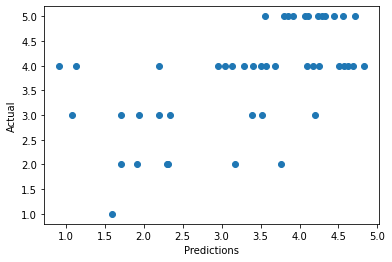

In [41]:
linear_model = sm.OLS(y_train, X_train).fit()
display(linear_model.summary())

# linear_model.fit(X_train, y_train)
predictions = linear_model.predict(X_test)

plt.scatter(predictions, y_test)
plt.xlabel("Predictions")
plt.ylabel("Actual")

In [42]:
for feature in x_headers:
    feature_no_zeros = X_train[feature][X_train[feature] > 0]
    y_train_no_zeros = y_train[X_train[feature] > 0]
    linear_model = sm.OLS(y_train, X_train[feature]).fit()
    print(linear_model.conf_int())
    print("_____")

                  0         1
eye_ratio  4.679824  5.596741
_____
                   0          1
head_size  16.247823  22.808312
_____
                  0         1
ear_ratio  4.594006  5.739664
_____
                  0         1
conf_head  4.421483  4.966627
_____
                   0         1
conf_eye_0  4.340362  4.753765
_____
                   0         1
conf_eye_1  4.905623  5.852652
_____
                   0         1
conf_ear_0  4.473812  5.004085
_____
                   0         1
conf_ear_1  5.273959  6.636756
_____
                  0         1
conf_nose  4.620653  5.351344
_____
                  0         1
sharpness  5.618881  6.706445
_____
                       0          1
head_location  13.125007  15.524392
_____


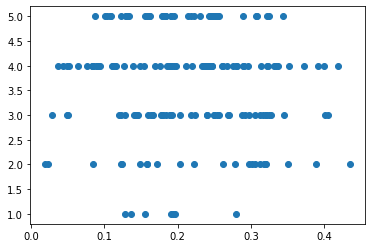

In [43]:
plt.scatter(X_train["head_location"][X_train["head_location"] < 1], y_train[X_train["head_location"] < 1])

NameError: name 'out_reshaped' is not defined

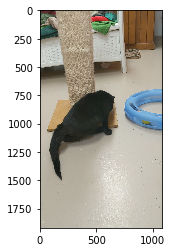

In [43]:
"""
ADDING CAT DETECTED PIXEL TO BACKGROUND RATIO
"""
CAT_CLASS = 8

model = pspnet_101_voc12()

for i, frame in frames_cnn.iterrows():
    image = frame["image"]
    plt.imshow(image)
    video_name = frame["video"].split(".mp4")[0]
    out = model.predict_segmentation(
        inp=image,
        out_fname=f"test_output/segmentation_test_{i}_{video_name}.png"
    )
#     cat_pixels = np.where(out_reshaped == 8)
    # This is the detected cat
    plt.imshow(out)
    import sys; sys.exit()

In [65]:
cat_detected_pixels = len(out == 8)
total = out.shape[0] * out.shape[1]
# print(cat_detected_pixels/total)

In [66]:
len(percentage) / 

SyntaxError: invalid syntax (<ipython-input-66-2935d4e71cfc>, line 1)

In [67]:
cv2.resize(out, (image.shape[1], image.shape[0]))

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3923: error: (-215:Assertion failed) func != 0 in function 'resize'
